## Use ipyrad to demultiplex by i7¶
April 6, 2022 <br>

In [1]:
# import packages into python
import ipyrad as ip
#import ipyparallel as ipp
import ipyrad.analysis as ipa
ip.set_log_level("DEBUG","/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/log_info_4may22")

# print the version of ipyrad you are running
print('ipyrad', ipa.__version__)

ipyrad 1.0.0-alpha


In [2]:
# Specify where the barcodes file is and where the data are
BARCODES_I7 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/i7_barcodes.txt"
RAW_DATA_PATH1 = "/pinky/sandra/RADcap/Run1_5apr2022/Undetermined_S0_R*_001.fastq.gz"

In [3]:
# Print the barcodes file
! cat $BARCODES_I7

RADcap_SLH_P2	GATGAGAC
RADcap_SLH_P3	GTAGCATC
RADcap_SLH_P4	TGCTCATG
RADcap_SLH_P5	AAGCGCAT
RADcap_SLH_P6	GGACAATC
RADcap_SLH_P7	GACTTAGG
RADcap_SLH_P8	TTGGTGAG
RADcap_SLH_P9	TGCTTCCA
RADcap_SLH_P10	TCGTTCGT
RADcap_SLH_P11	CGCAATCT
RADcap_SLH_P12	TATTCCGG
RADcap_SLH_P13	ACCTAAGG
RADcap_SLH_P15	CAGTTCTG
RADcap_SLH_P17	ATTCTGGC
RADcap_SLH_P18	TTGTGTGC
RADcap_SLH_P19	CAACACCT
RADcap_SLH_P20	GAGACGAT
RADcap_SLH_P21	AGAATGCC
RADcap_SLH_P22	ACTCAGAC
RADcap_SLH_P23	TGAAGACG
RADcap_SLH_P25	CGACGTTA
RADcap_SLH_P26	CGACCATT
RADcap_SLH_P28	ATGACCAG
RADcap_SLH_P30	CATCTACG
Ped_Plate4	GTGGTGTT


In [4]:
# create an Assembly object with a barcodes file
demux_outer = ip.Assembly("demux_i7s")
demux_outer.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/"
demux_outer.params.barcodes_path = BARCODES_I7
demux_outer.params.raw_fastq_path = RAW_DATA_PATH1
demux_outer.params.datatype = "pairddrad"
#demux_outer.params.restriction_overhang = ("ATCGG", "TAATTC")

# important: set hackers params to tell it to demux on i7 
demux_outer.hackers.demultiplex_on_i7_tags = True
#demux_outer.hackers.merge_technical_replicates = True   #use this if you have the same sample with different barcodes

In [ ]:
demux_outer.run("1", force=True, auto=True)

INFO     | cluster.py         | Establishing parallel ipcluster: 80 engines.
INFO     | base_step.py       | Step 1: Demultiplexing fastq data to samples


Step 1: Demultiplexing fastq data to samples
[                    ]   0% 11:43:54 | demultiplexing reads | 1 |

In [9]:
# Specify where the barcodes file is and where the data are
BARCODES_I7_fixed = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/i7_barcodes_fixed.txt"
RAW_DATA_PATH1 = "/pinky/sandra/RADcap/Run1_5apr2022/Undetermined_S0_R*_001.fastq.gz"

In [12]:
# create a new Assembly object with correct barcodes... should I allow 1 mismatch in the barcode to recover more reads?
demux_outer2 = ip.Assembly("demux_i7s_fixed")
demux_outer2.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/"
demux_outer2.params.barcodes_path = BARCODES_I7_fixed
demux_outer2.params.raw_fastq_path = RAW_DATA_PATH1
demux_outer2.params.datatype = "pairddrad"
#demux_outer2.params.max_barcode_mismatch = 1
#demux_outer.params.restriction_overhang = ("ATCGG", "TAATTC")

# important: set hackers params to tell it to demux on i7 
demux_outer2.hackers.demultiplex_on_i7_tags = True
#demux_outer.hackers.merge_technical_replicates = True   #use this if you have the same sample with different barcodesmax_barcode_mismatch

In [13]:
demux_outer2.run("1", force=True, auto=True)

INFO     | cluster.py         | Establishing parallel ipcluster: 80 engines.
INFO     | base_step.py       | Step 1: Demultiplexing fastq data to samples


Step 1: Demultiplexing fastq data to samples
[####################] 100% 19:22:25 | demultiplexing reads | 1 |
[####################] 100% 0:00:01 | concatenating chunked files | 1 |


INFO     | demux_raw2.py      | created 25 new samples
INFO     | demux_raw2.py      | 
                reads_raw
Ped_Plate4      229944941
RADcap_SLH_P10    3740260
RADcap_SLH_P11    2050821
RADcap_SLH_P12    2793615
RADcap_SLH_P13    2766640
RADcap_SLH_P15    1175625
RADcap_SLH_P17    5368336
RADcap_SLH_P18    4797827
RADcap_SLH_P19    6322518
RADcap_SLH_P2    18056440
RADcap_SLH_P20    2486992
RADcap_SLH_P21    6335771
RADcap_SLH_P22     951341
RADcap_SLH_P23    1165046
RADcap_SLH_P25    1466940
RADcap_SLH_P26    3916928
RADcap_SLH_P28    4271807
RADcap_SLH_P3    16658282
RADcap_SLH_P30    7841798
RADcap_SLH_P4    15584124
RADcap_SLH_P5    14199837
RADcap_SLH_P6    24618540
RADcap_SLH_P7    20098924
RADcap_SLH_P8    21126434
RADcap_SLH_P9    25225108
INFO     | cluster.py         | ipcluster stopped. Elapsed time: 19:22:38


## Use ipa to get reference genomes
April 7, 2022

### Digest multiple amaranth genomes, quinoa, and beet¶
make sure they are:
    - unmasked, by using tr to convert lower case to upper case letters
    - no funny characters in the fastq headers

#Assembled genomes

quinoa = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Chenopodium_quinoa_unmasked.fa"

beet = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Beta_vulgaris_unmasked.fa"

hypochondriacus = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Ahypochondriacus_459_v2.0.fa"

cruentus = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/cruentus.fsa"

tuberculatus = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Amaranthus_tuberculatus.faa"

hybridus = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Amaranthus_hybridus_subsp._hybridus.faa"

palmeri = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Amaranthus_palmeri.faa"

In [194]:
! grep "," /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Chenopodium_quinoa_unmasked.fa | head -5

>BDCQ01000001.1 CHENOPODIUM QUINOA DNA, CONTIG: CQU_C00001.1, STRAIN: EXPERIMENTAL STRAIN, KD, WHOLE GENOME SHOTGUN SEQUENCE
>BDCQ01000002.1 CHENOPODIUM QUINOA DNA, CONTIG: CQU_C00002.1, STRAIN: EXPERIMENTAL STRAIN, KD, WHOLE GENOME SHOTGUN SEQUENCE
>BDCQ01000003.1 CHENOPODIUM QUINOA DNA, CONTIG: CQU_C00003.1, STRAIN: EXPERIMENTAL STRAIN, KD, WHOLE GENOME SHOTGUN SEQUENCE
>BDCQ01000004.1 CHENOPODIUM QUINOA DNA, CONTIG: CQU_C00004.1, STRAIN: EXPERIMENTAL STRAIN, KD, WHOLE GENOME SHOTGUN SEQUENCE
>BDCQ01000005.1 CHENOPODIUM QUINOA DNA, CONTIG: CQU_C00005.1, STRAIN: EXPERIMENTAL STRAIN, KD, WHOLE GENOME SHOTGUN SEQUENCE
grep: write error: Broken pipe


In [15]:
! cat /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Chenopodium_quinoa_unmasked.fa | tr -d ',' > /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Chenopodium_quinoa_unmasked_fixed.fa
! grep "," /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Chenopodium_quinoa_unmasked_fixed.fa

In [195]:
! grep "," /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Beta_vulgaris_unmasked.fa | head -5

>CM009438.1 BETA VULGARIS SUBSP. VULGARIS CULTIVAR EL10 CHROMOSOME 1, WHOLE GENOME SHOTGUN SEQUENCE
>CM009439.1 BETA VULGARIS SUBSP. VULGARIS CULTIVAR EL10 CHROMOSOME 2, WHOLE GENOME SHOTGUN SEQUENCE
>CM009440.1 BETA VULGARIS SUBSP. VULGARIS CULTIVAR EL10 CHROMOSOME 3, WHOLE GENOME SHOTGUN SEQUENCE
>CM009441.1 BETA VULGARIS SUBSP. VULGARIS CULTIVAR EL10 CHROMOSOME 4, WHOLE GENOME SHOTGUN SEQUENCE
>CM009442.1 BETA VULGARIS SUBSP. VULGARIS CULTIVAR EL10 CHROMOSOME 5, WHOLE GENOME SHOTGUN SEQUENCE


In [17]:
! cat /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Beta_vulgaris_unmasked.fa | tr -d ',' > /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Beta_vulgaris_unmasked_fixed.fa
! grep "," /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Beta_vulgaris_unmasked_fixed.fa

In [18]:
! grep "," /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Ahypochondriacus_459_v2.0.fa

In [196]:
! grep "," /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/cruentus.fsa | head -5

>JAGPNP010000001.1 Amaranthus hybridus subsp. cruentus cultivar Arusha chromosome 7, whole genome shotgun sequence
>JAGPNP010000002.1 Amaranthus hybridus subsp. cruentus cultivar Arusha chromosome 3, whole genome shotgun sequence
>JAGPNP010000003.1 Amaranthus hybridus subsp. cruentus cultivar Arusha chromosome 9, whole genome shotgun sequence
>JAGPNP010000004.1 Amaranthus hybridus subsp. cruentus cultivar Arusha chromosome 6, whole genome shotgun sequence
>JAGPNP010000005.1 Amaranthus hybridus subsp. cruentus cultivar Arusha chromosome 8, whole genome shotgun sequence
grep: write error: Broken pipe


In [20]:
! cat /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/cruentus.fsa | tr -d ',' > /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Amaranthus_cruentus_unmasked_fixed.fa
! grep "," /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Amaranthus_cruentus_unmasked_fixed.fa

In [21]:
! grep "," /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Amaranthus_tuberculatus.faa

In [22]:
! grep "," /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Amaranthus_hybridus_subsp._hybridus.faa

In [23]:
! grep "," /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Amaranthus_palmeri.faa

In [28]:
#Assembled genomes

quinoa ="/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Chenopodium_quinoa_unmasked_fixed.fa"

beet = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Beta_vulgaris_unmasked_fixed.fa"

hypochondriacus = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Ahypochondriacus_459_v2.0.fa"

cruentus = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Amaranthus_cruentus_unmasked_fixed.fa"

tuberculatus = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Amaranthus_tuberculatus.faa"

hybridus = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Amaranthus_hybridus_subsp._hybridus.faa"

palmeri = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Amaranthus_palmeri.faa"

In [29]:
# digest the quinoa genome and write as fastq data
dg = ipa.digest_genome(
    fasta=quinoa,
    name="quinoa",
    workdir="/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/quinoa",
    re2="AAGCTT",
    re1="CCGG",
    paired=True,
    min_size=200,
    max_size=1000,
    ncopies=10,
    readlen=150,
    #nscaffolds=20,
)
dg.run()

extracted reads from 230071 positions


In [30]:
# digest the beet genome and write as fastq data
dg2 = ipa.digest_genome(
    fasta=beet,
    name="beet",
    workdir="/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/beet",
    re1="AAGCTT",
    re2="CCGG",
    paired=True,
    min_size=200,
    max_size=1000,
    ncopies=10,
    readlen=150,
    #nscaffolds=20,
)
dg2.run()

extracted reads from 101550 positions


In [31]:
# digest the hypochondriacus genome and write as fastq data
dg3 = ipa.digest_genome(
    fasta=hypochondriacus,
    name="hypochondriacus",
    workdir="/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/hypochondriacus",
    re1="AAGCTT",
    re2="CCGG",
    paired=True,
    min_size=200,
    max_size=1000,
    ncopies=10,
    readlen=150,
    #nscaffolds=20,
)
dg3.run()

extracted reads from 80912 positions


In [32]:
# digest the cruentus genome and write as fastq data
dg4 = ipa.digest_genome(
    fasta=cruentus,
    name="cruentus",
    workdir="/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/cruentus",
    re1="AAGCTT",
    re2="CCGG",
    paired=True,
    min_size=200,
    max_size=1000,
    ncopies=10,
    readlen=150,
    #nscaffolds=20,
)
dg4.run()

extracted reads from 75908 positions


In [33]:
# digest the tuberculatus genome and write as fastq data
dg5 = ipa.digest_genome(
    fasta=tuberculatus,
    name="tuberculatus",
    workdir="/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/tuberculatus",
    re1="AAGCTT",
    re2="CCGG",
    paired=True,
    min_size=200,
    max_size=1000,
    ncopies=10,
    readlen=150,
    #nscaffolds=20,
)
dg5.run()

extracted reads from 121460 positions


In [34]:
# digest the hybridus genome and write as fastq data
dg6 = ipa.digest_genome(
    fasta=hybridus,
    name="hybridus",
    workdir="/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/hybridus",
    re1="AAGCTT",
    re2="CCGG",
    paired=True,
    min_size=200,
    max_size=1000,
    ncopies=10,
    readlen=150,
    #nscaffolds=20,
)
dg6.run()

extracted reads from 81491 positions


In [35]:
# digest the palmeri genome and write as fastq data
dg7 = ipa.digest_genome(
    fasta=palmeri,
    name="palmeri",
    workdir="/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/palmeri",
    re1="AAGCTT",
    re2="CCGG",
    paired=True,
    min_size=200,
    max_size=1000,
    ncopies=10,
    readlen=150,
    #nscaffolds=20,
)
dg7.run()

extracted reads from 83162 positions


In [9]:
quinoa = ip.Assembly("quinoa")              #This is quinoa digested reference
quinoa.params.sorted_fastq_path = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/quinoa/quinoa_R*.fastq.gz"
quinoa.params.datatype = "pair3rad"
quinoa.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/quinoa/"
quinoa.params.restriction_overhang = ("ATCGG", "TAGCTT")

beet = ip.Assembly("beet")              #This is beet digested reference
beet.params.sorted_fastq_path = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/beet/beet_*.gz"
beet.params.datatype = "pair3rad"
beet.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/beet/"
beet.params.restriction_overhang = ("ATCGG", "TAGCTT")

hypo = ip.Assembly("hypochondriacus")              #This is hypochondriacus digested reference
hypo.params.sorted_fastq_path = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/hypochondriacus/hypochondriacus_*.gz"
hypo.params.datatype = "pair3rad"
hypo.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/hypochondriacus/"
hypo.params.restriction_overhang = ("ATCGG", "TAGCTT")

cruentus = ip.Assembly("cruentus")              #This is cruentus digested reference
cruentus.params.sorted_fastq_path = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/cruentus/cruentus_*.gz"
cruentus.params.datatype = "pair3rad"
cruentus.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/cruentus/"
cruentus.params.restriction_overhang = ("ATCGG", "TAGCTT")

tuberculatus = ip.Assembly("tuberculatus_genome")              #This is tuberculatus digested reference
tuberculatus.params.sorted_fastq_path = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/tuberculatus/tuberculatus_*.gz"
tuberculatus.params.datatype = "pair3rad"
tuberculatus.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/tuberculatus/"
tuberculatus.params.restriction_overhang = ("ATCGG", "TAGCTT")

hybridus = ip.Assembly("hybridus")              #This is hybridus digested reference
hybridus.params.sorted_fastq_path = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/hybridus/hybridus_*.gz"
hybridus.params.datatype = "pair3rad"
hybridus.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/hybridus/"
hybridus.params.restriction_overhang = ("ATCGG", "TAGCTT")

palmeri = ip.Assembly("palmeri")              #This is palmeri digested reference
palmeri.params.sorted_fastq_path = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/palmeri/palmeri_*.gz"
palmeri.params.datatype = "pair3rad"
palmeri.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/palmeri"
palmeri.params.restriction_overhang = ("ATCGG", "TAGCTT")


quinoa.run('1', force=True, cores=50)# ipyclient='ipyrad')
beet.run('1', force=True, cores=50)# ipyclient='ipyrad')
hypo.run('1', force=True, cores=50)# ipyclient='ipyrad')
cruentus.run('1', force=True, cores=50)# ipyclient='ipyrad')
tuberculatus.run('1', force=True, cores=50)# ipyclient='ipyrad')
hybridus.run('1', force=True, cores=50)# ipyclient='ipyrad')
palmeri.run('1', force=True, cores=50)# ipyclient='ipyrad')

INFO     | cluster.py         | Establishing parallel ipcluster: 50 engines.


Step 1: Loading demultiplexed fastq data files
[####################] 100% 0:00:01 | loading reads       


WARNING  | demux_sorted.py    | sample quinoa has 0 reads and will be excluded.
INFO     | demux_sorted.py    | created 0 new samples
INFO     | cluster.py         | ipcluster stopped. Elapsed time: 0:00:06
INFO     | cluster.py         | Establishing parallel ipcluster: 50 engines.


Step 1: Loading demultiplexed fastq data files
[####################] 100% 0:00:03 | loading reads       


INFO     | demux_sorted.py    | created 1 new samples
INFO     | cluster.py         | ipcluster stopped. Elapsed time: 0:00:09
INFO     | cluster.py         | Establishing parallel ipcluster: 50 engines.


Step 1: Loading demultiplexed fastq data files
[####################] 100% 0:00:02 | loading reads       


INFO     | demux_sorted.py    | created 1 new samples
INFO     | cluster.py         | ipcluster stopped. Elapsed time: 0:00:08
INFO     | cluster.py         | Establishing parallel ipcluster: 50 engines.


Step 1: Loading demultiplexed fastq data files
[####################] 100% 0:00:03 | loading reads       


INFO     | demux_sorted.py    | created 1 new samples
INFO     | cluster.py         | ipcluster stopped. Elapsed time: 0:00:09
INFO     | cluster.py         | Establishing parallel ipcluster: 50 engines.


Step 1: Loading demultiplexed fastq data files
[####################] 100% 0:00:03 | loading reads       


INFO     | demux_sorted.py    | created 1 new samples
INFO     | cluster.py         | ipcluster stopped. Elapsed time: 0:00:09
INFO     | cluster.py         | Establishing parallel ipcluster: 50 engines.


Step 1: Loading demultiplexed fastq data files
[####################] 100% 0:00:02 | loading reads       


INFO     | demux_sorted.py    | created 1 new samples
INFO     | cluster.py         | ipcluster stopped. Elapsed time: 0:00:08
INFO     | cluster.py         | Establishing parallel ipcluster: 50 engines.


Step 1: Loading demultiplexed fastq data files
[####################] 100% 0:00:02 | loading reads       


INFO     | demux_sorted.py    | created 1 new samples
INFO     | cluster.py         | ipcluster stopped. Elapsed time: 0:00:08


### Download and digest sister taxa transcriptomes from paper Morales-Briones 2021

In [24]:
! wget -r https://datadryad.org/stash/downloads/file_stream/410565

--2022-04-11 18:29:53--  https://datadryad.org/stash/downloads/file_stream/410565
Resolving datadryad.org (datadryad.org)... 34.212.247.214, 35.161.250.26
Connecting to datadryad.org (datadryad.org)|34.212.247.214|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dryad-assetstore-merritt-west.s3.us-west-2.amazonaws.com/ark%3A/13030/m5wq5cj9%7C2%7Cproducer/Analyses_data.tar.gz?response-content-type=application%2Fx-gtar&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEIn%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaCXVzLXdlc3QtMiJHMEUCIHtO%2Bm%2BEPsbA3DFCkrIlseW1EC4Vsb564rDyUw9H8yihAiEAhXXGiPlrho1QkRSbj1ouTPfOHO7GMqBCtSl88j5A%2BYQq%2BgMIMhAAGgw0NTE4MjY5MTQxNTciDFWsu3vW364y58LorCrXA6Kf0PvWSB95rmyMNs1ZNGKJOfETAa4cYNtxqj5gjfAIA%2BEYWRNNWCuXjTXvOrhfP%2FVeZa93oWUmsnphNuYkfz17MrVtO%2FHxrNzBt6IXJLYxgTPOHwnWNWDItyrDEr9rpbFC%2FTlOSGpkgjQ%2BdH2UA1OIHU3EURX7Id7Fc0pocOqFxTf63SIAyIyLQJIYfA2HTma7jjKVHsPMv0J%2B5o7LEE%2FgsjQzerN7dfZAwY1Wmf5ozPMIkeVIeqRb5MyT0DwJzXwEeb7UrZANKFkU6veFAv%2FXWbEJ

In [25]:
! mv /pinky/sandra/RADcap/Run1_5apr2022/datadryad.org/stash/downloads/file_stream/410565 /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Analyses_data.tar.gz

In [30]:
! tar -zxvf /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Analyses_data.tar.gz -C ./ipyrad/genomes/

./._Analyses_Data
Analyses_Data/
Analyses_Data/._.DS_Store
Analyses_Data/.DS_Store
Analyses_Data/4-taxon.tar.gz
Analyses_Data/11-taxon-net.tar.gz
Analyses_Data/chloroplast.tar.gz
Analyses_Data/._filtered_transcriptomes.tar.gz
Analyses_Data/filtered_transcriptomes.tar.gz
Analyses_Data/11-taxon-tree.tar.gz
Analyses_Data/105-taxon.tar.gz
Analyses_Data/41-taxon.tar.gz
Analyses_Data/all_13025_orthologs_cln_aln.tar.gz


In [34]:
! mkdir ./ipyrad/genomes/Analyses_Data/transcriptomes/
! tar -zxvf /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Analyses_Data/filtered_transcriptomes.tar.gz -C ./ipyrad/genomes/Analyses_Data/transcriptomes/

filtered_transcriptomes/
filtered_transcriptomes/Cheama_Chenopodium_amaranticolor.cds.fa.99.cdhitest
filtered_transcriptomes/MJM2311_Krascheninnikovia_lanata.cds.fa.99.cdhitest
filtered_transcriptomes/KalcuSFB_Kalidium_cuspidatum.cds.fa.99.cdhitest
filtered_transcriptomes/HerSFB_Herniaria_latifolia.cds.fa.99.cdhitest
filtered_transcriptomes/ZBPY_Alternanthera_brasiliana.cds.fa.99.cdhitest
filtered_transcriptomes/Sufr_Suaeda_fruticosa.cds.fa.99.cdhitest
filtered_transcriptomes/WGET_Bassia_scoparia.cds.fa.99.cdhitest
filtered_transcriptomes/MJM1679_Suaeda_linearis.cds.fa.99.cdhitest
filtered_transcriptomes/Agsq_Agriophyllum_squarrosum.cds.fa.99.cdhitest
filtered_transcriptomes/WMLW_Amaranthus_retroflexus.cds.fa.99.cdhitest
filtered_transcriptomes/Oxru_Oxybasis_rubra.cds.fa.99.cdhitest
filtered_transcriptomes/BWRK_Alternanthera_sessilis.cds.fa.99.cdhitest
filtered_transcriptomes/BJKT_Delosperma_echinatum.cds.fa.99.cdhitest
filtered_transcriptomes/MSB0000170SFB_Corispermum_hyssopifolium.cd

In [199]:
! grep -m 5 ">" /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Analyses_Data/transcriptomes/filtered_transcriptomes/Deeamar_Deeringia_amaranthoides.cds.fa.99.cdhitest

>Deeamar_Deeringia_amaranthoides@DN10012_c0_g1_i2
>Deeamar_Deeringia_amaranthoides@DN10020_c0_g1_i1
>Deeamar_Deeringia_amaranthoides@DN10023_c0_g1_i1
>Deeamar_Deeringia_amaranthoides@DN10027_c0_g1_i1
>Deeamar_Deeringia_amaranthoides@DN10029_c0_g1_i1


In [198]:
! cat /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Analyses_Data/transcriptomes/filtered_transcriptomes/Deeamar_Deeringia_amaranthoides.cds.fa.99.cdhitest | tr '@' '_' > /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Analyses_Data/transcriptomes/filtered_transcriptomes/fixed_Deeringia_amaranthoides.cds.fa.99.cdhitest
! grep -m 5 ">" /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Analyses_Data/transcriptomes/filtered_transcriptomes/fixed_Deeringia_amaranthoides.cds.fa.99.cdhitest

>Deeamar_Deeringia_amaranthoides_DN10012_c0_g1_i2
>Deeamar_Deeringia_amaranthoides_DN10020_c0_g1_i1
>Deeamar_Deeringia_amaranthoides_DN10023_c0_g1_i1
>Deeamar_Deeringia_amaranthoides_DN10027_c0_g1_i1
>Deeamar_Deeringia_amaranthoides_DN10029_c0_g1_i1


In [200]:
! grep -m 5 ">" /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Analyses_Data/transcriptomes/filtered_transcriptomes/Hergla_Hermbstaedtia_glauca.cds.fa.99.cdhitest

>Hergla_Hermbstaedtia_glauca@DN10004_c0_g1_i1
>Hergla_Hermbstaedtia_glauca@DN10027_c0_g1_i1
>Hergla_Hermbstaedtia_glauca@DN10050_c0_g1_i2
>Hergla_Hermbstaedtia_glauca@DN10051_c0_g1_i1
>Hergla_Hermbstaedtia_glauca@DN10056_c0_g1_i1


In [201]:
! cat /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Analyses_Data/transcriptomes/filtered_transcriptomes/Hergla_Hermbstaedtia_glauca.cds.fa.99.cdhitest | tr '@' '_' > /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Analyses_Data/transcriptomes/filtered_transcriptomes/fixed_Hermbstaedtia_glauca.cds.fa.99.cdhitest
! grep -m 5 ">" /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Analyses_Data/transcriptomes/filtered_transcriptomes/fixed_Hermbstaedtia_glauca.cds.fa.99.cdhitest

>Hergla_Hermbstaedtia_glauca_DN10004_c0_g1_i1
>Hergla_Hermbstaedtia_glauca_DN10027_c0_g1_i1
>Hergla_Hermbstaedtia_glauca_DN10050_c0_g1_i2
>Hergla_Hermbstaedtia_glauca_DN10051_c0_g1_i1
>Hergla_Hermbstaedtia_glauca_DN10056_c0_g1_i1


In [41]:
# digest the quinoa genome and write as fastq data
dg = ipa.digest_genome(
    fasta="/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Analyses_Data/transcriptomes/filtered_transcriptomes/fixed_Hermbstaedtia_glauca.cds.fa.99.cdhitest",
    name="hermbstaedtia",
    workdir="/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/hermbstaedtia",
    re2="AAGCTT",
    re1="CCGG",
    paired=True,
    min_size=50,
    max_size=1500,
    ncopies=10,
    readlen=150,
    #nscaffolds=20,
)
dg.run()

extracted reads from 8346 positions


In [42]:
dg2 = ipa.digest_genome(
    fasta="/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Analyses_Data/transcriptomes/filtered_transcriptomes/fixed_Deeringia_amaranthoides.cds.fa.99.cdhitest",
    name="deeringia",
    workdir="/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/deeringia",
    re2="AAGCTT",
    re1="CCGG",
    paired=True,
    min_size=50,
    max_size=1500,
    ncopies=10,
    readlen=150,
    #nscaffolds=20,
)
dg2.run()

extracted reads from 9046 positions


In [11]:
deer = ip.Assembly("deeringia")         #This is deeringia in silico digested transcriptome
deer.params.sorted_fastq_path = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/deeringia/deeringia_R*.fastq.gz"
deer.params.datatype = "pair3rad"
deer.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/deeringia"
deer.params.restriction_overhang = ("ATCGG", "TAGCTT")

herm = ip.Assembly("hermbstaedtia")         #This herbstaedtia in silico digested transcriptome
herm.params.sorted_fastq_path = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/hermbstaedtia/hermbstaedtia_R*.fastq.gz"
herm.params.datatype = "pair3rad"
herm.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/hermbstaedtia"
herm.params.restriction_overhang = ("ATCGG", "TAGCTT")

# run step 1 to sort/load fastq files 
deer.run('1', force=True, cores=50)# ipyclient='ipyrad')  #very quick to run
herm.run('1', force=True, cores=50)# ipyclient='ipyrad')  

INFO     | cluster.py         | Establishing parallel ipcluster: 50 engines.


Step 1: Loading demultiplexed fastq data files
[####################] 100% 0:00:02 | loading reads       


INFO     | demux_sorted.py    | created 1 new samples
INFO     | cluster.py         | ipcluster stopped. Elapsed time: 0:00:08
INFO     | cluster.py         | Establishing parallel ipcluster: 50 engines.


Step 1: Loading demultiplexed fastq data files
[####################] 100% 0:00:02 | loading reads       


INFO     | demux_sorted.py    | created 1 new samples
INFO     | cluster.py         | ipcluster stopped. Elapsed time: 0:00:08


## Now start analyzing the new data

In [202]:
INNER_BARCODES_plate1 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate1_inline_barcodes.txt"
INNER_BARCODES_plate2 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate2_inline_barcodes.txt"
INNER_BARCODES_plate3 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate3_inline_barcodes.txt"
INNER_BARCODES_plate4 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate4_inline_barcodes.txt"
INNER_BARCODES_plate5 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate5_inline_barcodes.txt"
INNER_BARCODES_plate6 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate6_inline_barcodes.txt"
INNER_BARCODES_plate7 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate7_inline_barcodes.txt"
INNER_BARCODES_plate8 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate8_inline_barcodes.txt"
INNER_BARCODES_plate9 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate9_inline_barcodes.txt"
INNER_BARCODES_plate10 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate10_inline_barcodes.txt"
INNER_BARCODES_plate11 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate11_inline_barcodes.txt"
INNER_BARCODES_plate12 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate12_inline_barcodes.txt"
INNER_BARCODES_plate13 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate13_inline_barcodes.txt"
INNER_BARCODES_plate14 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate14_inline_barcodes.txt"
INNER_BARCODES_plate15 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate15_inline_barcodes.txt"
INNER_BARCODES_plate16 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate16_inline_barcodes.txt"
INNER_BARCODES_plate17 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate17_inline_barcodes.txt"
INNER_BARCODES_plate18 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate18_inline_barcodes.txt"
INNER_BARCODES_plate19 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate19_inline_barcodes.txt"
INNER_BARCODES_plate20 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate20_inline_barcodes.txt"
INNER_BARCODES_plate21 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate21_inline_barcodes.txt"
INNER_BARCODES_plate22 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate22_inline_barcodes.txt"
INNER_BARCODES_plate23 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate23_inline_barcodes.txt"
INNER_BARCODES_plate24 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate24_inline_barcodes.txt"
INNER_BARCODES_plate25 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate25_inline_barcodes.txt"
INNER_BARCODES_plate26 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate26_inline_barcodes.txt"
INNER_BARCODES_plate27 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate27_inline_barcodes.txt"
INNER_BARCODES_plate28 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate28_inline_barcodes.txt"
INNER_BARCODES_plate29 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate29_inline_barcodes.txt"
INNER_BARCODES_plate30 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_plate30_inline_barcodes.txt"


In [4]:
RADcap_data_plate1 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P1_R*.fastq.gz"
RADcap_data_plate2 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P2_R*.fastq.gz"
RADcap_data_plate3 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P3_R*.fastq.gz"
RADcap_data_plate4 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P4_R*.fastq.gz"
RADcap_data_plate5 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P5_R*.fastq.gz"
RADcap_data_plate6 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P6_R*.fastq.gz"
RADcap_data_plate7 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P7_R*.fastq.gz"
RADcap_data_plate8 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P8_R*.fastq.gz"
RADcap_data_plate9 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P9_R*.fastq.gz"
RADcap_data_plate10 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P10_R*.fastq.gz"
RADcap_data_plate11 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P11_R*.fastq.gz"
RADcap_data_plate12 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P12_R*.fastq.gz"
RADcap_data_plate13 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P13_R*.fastq.gz"
RADcap_data_plate14 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P14_R*.fastq.gz"
RADcap_data_plate15 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P15_R*.fastq.gz"
RADcap_data_plate16 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P16_R*.fastq.gz"
RADcap_data_plate17 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P17_R*.fastq.gz"
RADcap_data_plate18 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P18_R*.fastq.gz"
RADcap_data_plate19 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P19_R*.fastq.gz"
RADcap_data_plate20 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P20_R*.fastq.gz"
RADcap_data_plate21 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P21_R*.fastq.gz"
RADcap_data_plate22 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P22_R*.fastq.gz"
RADcap_data_plate23 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P23_R*.fastq.gz"
RADcap_data_plate24 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P24_R*.fastq.gz"
RADcap_data_plate25 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P25_R*.fastq.gz"
RADcap_data_plate26 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P26_R*.fastq.gz"
RADcap_data_plate27 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P27_R*.fastq.gz"
RADcap_data_plate28 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P28_R*.fastq.gz"
RADcap_data_plate29 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P29_R*.fastq.gz"
RADcap_data_plate30 = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/demux_i7s_fixed_fastqs/RADcap_SLH_P30_R*.fastq.gz"

In [5]:
# load each library from i7-demux'd fastq files
#lib1 = ip.Assembly("SLH_AL_RADcap_plate1")
#lib1.params.raw_fastq_path = RADcap_data_plate1
#lib1.params.barcodes_path = INNER_BARCODES_plate1
#lib1.params.datatype = "pair3rad"
#lib1.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
#lib1.params.max_barcode_mismatch = 1
#lib1.params.restriction_overhang = ("ATCGG", "TAGCTT")

lib2 = ip.Assembly("SLH_AL_RADcap_plate2")
lib2.params.raw_fastq_path = RADcap_data_plate2
lib2.params.barcodes_path = INNER_BARCODES_plate2
lib2.params.datatype = "pair3rad"
lib2.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
lib2.params.max_barcode_mismatch = 1
lib2.params.restriction_overhang = ("ATCGG", "TAGCTT")

lib3 = ip.Assembly("SLH_AL_RADcap_plate3")
lib3.params.raw_fastq_path = RADcap_data_plate3
lib3.params.barcodes_path = INNER_BARCODES_plate3
lib3.params.datatype = "pair3rad"
lib3.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
lib3.params.max_barcode_mismatch = 1
lib3.params.restriction_overhang = ("ATCGG", "TAGCTT")

lib4 = ip.Assembly("SLH_AL_RADcap_plate4")
lib4.params.raw_fastq_path = RADcap_data_plate4
lib4.params.barcodes_path = INNER_BARCODES_plate4
lib4.params.datatype = "pair3rad"
lib4.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
lib4.params.max_barcode_mismatch = 1
lib4.params.restriction_overhang = ("ATCGG", "TAGCTT")

lib5 = ip.Assembly("SLH_AL_RADcap_plate5")
lib5.params.raw_fastq_path = RADcap_data_plate5
lib5.params.barcodes_path = INNER_BARCODES_plate5
lib5.params.datatype = "pair3rad"
lib5.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
lib5.params.max_barcode_mismatch = 1
lib5.params.restriction_overhang = ("ATCGG", "TAGCTT")

lib6 = ip.Assembly("SLH_AL_RADcap_plate6")
lib6.params.raw_fastq_path = RADcap_data_plate6
lib6.params.barcodes_path = INNER_BARCODES_plate6
lib6.params.datatype = "pair3rad"
lib6.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
lib6.params.max_barcode_mismatch = 1
lib6.params.restriction_overhang = ("ATCGG", "TAGCTT")

lib7 = ip.Assembly("SLH_AL_RADcap_plate7")
lib7.params.raw_fastq_path = RADcap_data_plate7
lib7.params.barcodes_path = INNER_BARCODES_plate7
lib7.params.datatype = "pair3rad"
lib7.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
lib7.params.max_barcode_mismatch = 1
lib7.params.restriction_overhang = ("ATCGG", "TAGCTT")

lib8 = ip.Assembly("SLH_AL_RADcap_plate8")
lib8.params.raw_fastq_path = RADcap_data_plate8
lib8.params.barcodes_path = INNER_BARCODES_plate8
lib8.params.datatype = "pair3rad"
lib8.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
lib8.params.max_barcode_mismatch = 1
lib8.params.restriction_overhang = ("ATCGG", "TAGCTT")

lib9 = ip.Assembly("SLH_AL_RADcap_plate9")
lib9.params.raw_fastq_path = RADcap_data_plate9
lib9.params.barcodes_path = INNER_BARCODES_plate9
lib9.params.datatype = "pair3rad"
lib9.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
lib9.params.max_barcode_mismatch = 1
lib9.params.restriction_overhang = ("ATCGG", "TAGCTT")

lib10 = ip.Assembly("SLH_AL_RADcap_plate10")
lib10.params.raw_fastq_path = RADcap_data_plate10
lib10.params.barcodes_path = INNER_BARCODES_plate10
lib10.params.datatype = "pair3rad"
lib10.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
lib10.params.max_barcode_mismatch = 1
lib10.params.restriction_overhang = ("ATCGG", "TAGCTT")

lib11 = ip.Assembly("SLH_AL_RADcap_plate11")
lib11.params.raw_fastq_path = RADcap_data_plate11
lib11.params.barcodes_path = INNER_BARCODES_plate11
lib11.params.datatype = "pair3rad"
lib11.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
lib11.params.max_barcode_mismatch = 1
lib11.params.restriction_overhang = ("ATCGG", "TAGCTT")

lib12 = ip.Assembly("SLH_AL_RADcap_plate12")
lib12.params.raw_fastq_path = RADcap_data_plate12
lib12.params.barcodes_path = INNER_BARCODES_plate12
lib12.params.datatype = "pair3rad"
lib12.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
lib12.params.max_barcode_mismatch = 1
lib12.params.restriction_overhang = ("ATCGG", "TAGCTT")

lib13 = ip.Assembly("SLH_AL_RADcap_plate13")
lib13.params.raw_fastq_path = RADcap_data_plate13
lib13.params.barcodes_path = INNER_BARCODES_plate13
lib13.params.datatype = "pair3rad"
lib13.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
lib13.params.max_barcode_mismatch = 1
lib13.params.restriction_overhang = ("ATCGG", "TAGCTT")

#lib14 = ip.Assembly("SLH_AL_RADcap_plate14")
#lib14.params.raw_fastq_path = RADcap_data_plate14
#lib14.params.barcodes_path = INNER_BARCODES_plate14
#lib14.params.datatype = "pair3rad"
#lib14.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
#lib14.params.max_barcode_mismatch = 1
#lib14.params.restriction_overhang = ("ATCGG", "TAGCTT")

lib15 = ip.Assembly("SLH_AL_RADcap_plate15")
lib15.params.raw_fastq_path = RADcap_data_plate15
lib15.params.barcodes_path = INNER_BARCODES_plate15
lib15.params.datatype = "pair3rad"
lib15.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
lib15.params.max_barcode_mismatch = 1
lib15.params.restriction_overhang = ("ATCGG", "TAGCTT")

#lib16 = ip.Assembly("SLH_AL_RADcap_plate16")
#lib16.params.raw_fastq_path = RADcap_data_plate16
#lib16.params.barcodes_path = INNER_BARCODES_plate16
#lib16.params.datatype = "pair3rad"
#lib16.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
#lib16.params.max_barcode_mismatch = 1
#lib16.params.restriction_overhang = ("ATCGG", "TAGCTT")

# load each library from i7-demux'd fastq files
lib17 = ip.Assembly("SLH_AL_RADcap_plate17")
lib17.params.raw_fastq_path = RADcap_data_plate17
lib17.params.barcodes_path = INNER_BARCODES_plate17
lib17.params.datatype = "pair3rad"
lib17.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
lib17.params.max_barcode_mismatch = 1
lib17.params.restriction_overhang = ("ATCGG", "TAGCTT")

lib18 = ip.Assembly("SLH_AL_RADcap_plate18")
lib18.params.raw_fastq_path = RADcap_data_plate18
lib18.params.barcodes_path = INNER_BARCODES_plate18
lib18.params.datatype = "pair3rad"
lib18.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
lib18.params.max_barcode_mismatch = 1
lib18.params.restriction_overhang = ("ATCGG", "TAGCTT")

lib19 = ip.Assembly("SLH_AL_RADcap_plate19")
lib19.params.raw_fastq_path = RADcap_data_plate19
lib19.params.barcodes_path = INNER_BARCODES_plate19
lib19.params.datatype = "pair3rad"
lib19.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
lib19.params.max_barcode_mismatch = 1
lib19.params.restriction_overhang = ("ATCGG", "TAGCTT")

lib20 = ip.Assembly("SLH_AL_RADcap_plate20")
lib20.params.raw_fastq_path = RADcap_data_plate20
lib20.params.barcodes_path = INNER_BARCODES_plate20
lib20.params.datatype = "pair3rad"
lib20.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
lib20.params.max_barcode_mismatch = 1
lib20.params.restriction_overhang = ("ATCGG", "TAGCTT")

lib21 = ip.Assembly("SLH_AL_RADcap_plate21")
lib21.params.raw_fastq_path = RADcap_data_plate21
lib21.params.barcodes_path = INNER_BARCODES_plate21
lib21.params.datatype = "pair3rad"
lib21.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
lib21.params.max_barcode_mismatch = 1
lib21.params.restriction_overhang = ("ATCGG", "TAGCTT")

lib22 = ip.Assembly("SLH_AL_RADcap_plate22")
lib22.params.raw_fastq_path = RADcap_data_plate22
lib22.params.barcodes_path = INNER_BARCODES_plate22
lib22.params.datatype = "pair3rad"
lib22.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
lib22.params.max_barcode_mismatch = 1
lib22.params.restriction_overhang = ("ATCGG", "TAGCTT")

lib23 = ip.Assembly("SLH_AL_RADcap_plate23")
lib23.params.raw_fastq_path = RADcap_data_plate23
lib23.params.barcodes_path = INNER_BARCODES_plate23
lib23.params.datatype = "pair3rad"
lib23.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
lib23.params.max_barcode_mismatch = 1
lib23.params.restriction_overhang = ("ATCGG", "TAGCTT")

#lib24 = ip.Assembly("SLH_AL_RADcap_plate24")
#lib24.params.raw_fastq_path = RADcap_data_plate24
#lib24.params.barcodes_path = INNER_BARCODES_plate24
#lib24.params.datatype = "pair3rad"
#lib24.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
#lib24.params.max_barcode_mismatch = 1
#lib24.params.restriction_overhang = ("ATCGG", "TAGCTT")

lib25 = ip.Assembly("SLH_AL_RADcap_plate25")
lib25.params.raw_fastq_path = RADcap_data_plate25
lib25.params.barcodes_path = INNER_BARCODES_plate25
lib25.params.datatype = "pair3rad"
lib25.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
lib25.params.max_barcode_mismatch = 1
lib25.params.restriction_overhang = ("ATCGG", "TAGCTT")

lib26 = ip.Assembly("SLH_AL_RADcap_plate26")
lib26.params.raw_fastq_path = RADcap_data_plate26
lib26.params.barcodes_path = INNER_BARCODES_plate26
lib26.params.datatype = "pair3rad"
lib26.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
lib26.params.max_barcode_mismatch = 1
lib26.params.restriction_overhang = ("ATCGG", "TAGCTT")

#lib27 = ip.Assembly("SLH_AL_RADcap_plate27")
#lib27.params.raw_fastq_path = RADcap_data_plate27
#lib27.params.barcodes_path = INNER_BARCODES_plate27
#lib27.params.datatype = "pair3rad"
#lib27.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
#lib27.params.max_barcode_mismatch = 1
#lib27.params.restriction_overhang = ("ATCGG", "TAGCTT")

lib28 = ip.Assembly("SLH_AL_RADcap_plate28")
lib28.params.raw_fastq_path = RADcap_data_plate28
lib28.params.barcodes_path = INNER_BARCODES_plate28
lib28.params.datatype = "pair3rad"
lib28.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
lib28.params.max_barcode_mismatch = 1
lib28.params.restriction_overhang = ("ATCGG", "TAGCTT")

#lib29 = ip.Assembly("SLH_AL_RADcap_plate29")
#lib29.params.raw_fastq_path = RADcap_data_plate29
#lib29.params.barcodes_path = INNER_BARCODES_plate29
#lib29.params.datatype = "pair3rad"
#lib29.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
#lib29.params.max_barcode_mismatch = 1
#lib29.params.restriction_overhang = ("ATCGG", "TAGCTT")

lib30 = ip.Assembly("SLH_AL_RADcap_plate30")
lib30.params.raw_fastq_path = RADcap_data_plate30
lib30.params.barcodes_path = INNER_BARCODES_plate30
lib30.params.datatype = "pair3rad"
lib30.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
lib30.params.max_barcode_mismatch = 1
lib30.params.restriction_overhang = ("ATCGG", "TAGCTT")

In [ ]:
# run step 1 to sort/load fastq files 

#lib1.run('1', force=True, cores=50)
lib2.run('1', force=True, cores=50)
lib3.run('1', force=True, cores=50)
lib4.run('1', force=True, cores=50)
lib5.run('1', force=True, cores=50)
lib6.run('1', force=True, cores=50)
lib7.run('1', force=True, cores=50)
lib8.run('1', force=True, cores=50)
lib9.run('1', force=True, cores=50)
lib10.run('1', force=True, cores=50)
lib11.run('1', force=True, cores=50)
lib12.run('1', force=True, cores=50)
lib13.run('1', force=True, cores=50)
#lib14.run('1', force=True, cores=50)
lib15.run('1', force=True, cores=50)
#lib16.run('1', force=True, cores=50)
lib17.run('1', force=True, cores=50)
lib18.run('1', force=True, cores=50)
lib19.run('1', force=True, cores=50)
lib20.run('1', force=True, cores=50)
lib21.run('1', force=True, cores=50)
lib22.run('1', force=True, cores=50)
lib23.run('1', force=True, cores=50)
#lib24.run('1', force=True, cores=50)
lib25.run('1', force=True, cores=50)
lib26.run('1', force=True, cores=50)
#lib27.run('1', force=True, cores=50)
lib28.run('1', force=True, cores=50)
#lib29.run('1', force=True, cores=50)
lib30.run('1', force=True, cores=50)

INFO     | cluster.py         | Establishing parallel ipcluster: 50 engines.
INFO     | base_step.py       | Step 1: Demultiplexing fastq data to samples


Step 1: Demultiplexing fastq data to samples
[####################] 100% 1:05:16 | demultiplexing reads
[####################] 100% 0:00:01 | concatenating chunked files


INFO     | demux_raw2.py      | created 96 new samples
INFO     | demux_raw2.py      | 
                     reads_raw
SLH_AL_0005-contemp     232086
SLH_AL_0006-comtemp      85807
SLH_AL_0010-contemp      52472
SLH_AL_0023               2577
SLH_AL_0026-contemp     135838
SLH_AL_0030-contemp      76096
SLH_AL_0034-contemp      84264
SLH_AL_0055-contemp      27094
SLH_AL_0088-contemp     185848
SLH_AL_0096-contemp      80219
SLH_AL_0118              30762
SLH_AL_0246               1339
SLH_AL_0264               3732
SLH_AL_0267              38255
SLH_AL_0268              89755
SLH_AL_0277              50621
SLH_AL_0278              55235
SLH_AL_0279              63751
SLH_AL_0305              62789
SLH_AL_0322             272726
SLH_AL_0341             306810
SLH_AL_0350             101023
SLH_AL_0401             231356
SLH_AL_0407             200563
SLH_AL_0422             224958
SLH_AL_0427             241782
SLH_AL_0439             322411
SLH_AL_0440             158823
SLH_AL_0441  

Step 1: Demultiplexing fastq data to samples
[                    ]   0% 0:21:25 | demultiplexing reads

In [6]:
lib17.run('1', force=True, cores=80)
lib30.run('1', force=True, cores=80)

INFO     | cluster.py         | Establishing parallel ipcluster: 80 engines.
INFO     | base_step.py       | Step 1: Demultiplexing fastq data to samples


Step 1: Demultiplexing fastq data to samples
[####################] 100% 0:18:49 | demultiplexing reads
[####################] 100% 0:00:02 | concatenating chunked files


INFO     | demux_raw2.py      | created 96 new samples
INFO     | demux_raw2.py      | 
                         reads_raw
SLH_AL_0041                  76517
SLH_AL_0074                  57259
SLH_AL_0104                   4971
SLH_AL_0189_0214_contam       2295
SLH_AL_0214                   3304
SLH_AL_0222                    370
SLH_AL_0227                    122
SLH_AL_0228                    469
SLH_AL_0230                   5385
SLH_AL_0245                   5489
SLH_AL_0256                    232
SLH_AL_0266                    277
SLH_AL_0301                  75277
SLH_AL_0320                  67846
SLH_AL_0335                  59986
SLH_AL_0354                 113188
SLH_AL_0375                  59611
SLH_AL_0378                  53048
SLH_AL_0381                  64753
SLH_AL_0386                  48421
SLH_AL_0457                  72491
SLH_AL_0464                  67358
SLH_AL_0474                  70244
SLH_AL_0503                  55614
SLH_AL_0515                  67291
SL

Step 1: Demultiplexing fastq data to samples


WARNING  | demux_raw2.py      | 
Technical replicates are present (samples with same name in the barcodes file)
and will be merged into one sample.To not merge replicate samples set
`hackers.merge_technical_replicates = False), which will instead rename 
the samples with a '-technical-replicate-x'suffix.
You can change this in the 'hacker' settings in the project JSON file.


[####################] 100% 0:28:39 | demultiplexing reads
[####################] 100% 0:00:01 | concatenating chunked files


INFO     | demux_raw2.py      | created 95 new samples
INFO     | demux_raw2.py      | 
                         reads_raw
SLH_AL_0719                  82613
SLH_AL_0788                    262
SLH_AL_0825                  86296
SLH_AL_0919                  77194
SLH_AL_0926                  63952
SLH_AL_0999                  69224
SLH_AL_1029                  71091
SLH_AL_1045                 129152
SLH_AL_1077                  74306
SLH_AL_1080                  81285
SLH_AL_1084                  54688
SLH_AL_1100                  84201
SLH_AL_1112                  62260
SLH_AL_1114                 110380
SLH_AL_1125                 125780
SLH_AL_1146                  86773
SLH_AL_1188                  77793
SLH_AL_1220                  83686
SLH_AL_1261                  94384
SLH_AL_1272                  89576
SLH_AL_1294                  79956
SLH_AL_1312                  73969
SLH_AL_1322                  86162
SLH_AL_1332                  63376
SLH_AL_1335                  60371
SL

In [7]:
lib21.run('1', force=True, cores=80)

INFO     | cluster.py         | Establishing parallel ipcluster: 80 engines.
INFO     | base_step.py       | Step 1: Demultiplexing fastq data to samples


Step 1: Demultiplexing fastq data to samples
[####################] 100% 0:21:16 | demultiplexing reads
[####################] 100% 0:00:02 | concatenating chunked files


INFO     | demux_raw2.py      | created 96 new samples
INFO     | demux_raw2.py      | 
                        reads_raw
SLH_AL_0005-restricted      13480
SLH_AL_0048-contemp         46675
SLH_AL_1914                 29253
SLH_AL_1915                 56086
SLH_AL_1923                 47536
SLH_AL_1963                 25480
SLH_AL_1983                 71153
SLH_AL_2021                 38345
SLH_AL_2025                 58811
SLH_AL_2028                 42234
SLH_AL_2029                 34828
SLH_AL_2072                 38501
SLH_AL_2076                 87420
SLH_AL_2085                 77840
SLH_AL_2089                 73470
SLH_AL_2097                 75255
SLH_AL_2113                 64989
SLH_AL_2116                 69379
SLH_AL_2128                 84870
SLH_AL_2129                 62477
SLH_AL_2131                 99292
SLH_AL_2133                 56852
SLH_AL_2137                146807
SLH_AL_2142                105153
SLH_AL_2143                114608
SLH_AL_2162                 

In [2]:
# Reload assemblies if necessary

#lib1 = ip.load("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate1.json")
lib2 = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate2.json")
lib3 = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate3.json")
lib4 = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate4.json")
lib5 = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate5.json")
lib6 = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate6.json")
lib7 = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate7.json")
lib8 = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate8.json")
lib9 = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate9.json")
lib10 = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate10.json")
lib11 = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate11.json")
lib12 = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate12.json")
lib13 = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate13.json")
#lib14 = ip.load("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate14.json")
lib15 = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate15.json")
#lib16 = ip.load("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate16.json")
lib17 = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate17.json")
lib18 = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate18.json")
lib19 = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate19.json")
lib20 = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate20.json")
lib21 = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate21.json")
lib22 = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate22.json")
lib23 = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate23.json")
#lib24 = ip.load("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate24.json")
lib25 = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate25.json")
lib26 = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate26.json")
#lib27 = ip.load("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate27.json")
lib28 = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate28.json")
#lib29 = ip.load("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate29.json")
lib30 = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate30.json")


beet = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/beet/beet.json")
hypo = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/hypochondriacus/hypochondriacus.json")
tuberculatus = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/tuberculatus/tuberculatus_genome.json")
palmeri = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/palmeri/palmeri.json")
cruentus = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/cruentus/cruentus.json")
hybridus = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/hybridus/hybridus.json")
deer = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/deeringia/deeringia.json")
herm = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/hermbstaedtia/hermbstaedtia.json")

In [3]:
# create a merged assembly
merged = ip.merge(
    name="RADcap_12april22", 
    assemblies=[#lib1,
        lib2, lib3, lib4, lib5, lib6, lib7, lib8, lib9, lib10, lib11, lib12, lib13,
               #lib14,
        lib15, #lib16,
        lib17, lib18, lib19, lib20, lib21, lib22, lib23, #lib24,
        lib25,
               lib26, #lib27, 
        lib28, #lib29, 
        lib30,
        beet, hypo, cruentus, tuberculatus, 
                hybridus, palmeri, deer, herm],
    #rename_dict=ndict,
    )
#merged.save()

In [4]:
hypochondriacus = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Ahypochondriacus_459_v2.0.fa"


# set params on this assembly
merged.params.project_dir = "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad"
merged.params.assembly_method = "reference"
merged.params.reference_sequence = hypochondriacus
merged.params.restriction_overhang = ("ATCGG", "TAGCTT")
merged.params.datatype = "pair3rad"
#merged.params.phred_qscore_offset = 43
merged.params.filter_adapters = 3
merged.params.min_depth_majrule = 3
merged.params.min_depth_statistical = 5
merged.params.max_barcode_mismatch = 1
merged.params.min_samples_locus = 100
merged.params.max_n_consens = 0.07
merged.params.max_h_consens = 0.07
merged.params.max_snps_locus = 0.4
merged.params.max_indels_locus = 10
merged.params.output_formats = ["p","s","l"]
merged.hackers.exclude_reference=False
merged.hackers.declone_PCR_duplicates=True
merged.params

{
  "assembly_name": "RADcap_12april22",
  "project_dir": "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad",
  "raw_fastq_path": null,
  "barcodes_path": null,
  "sorted_fastq_path": null,
  "assembly_method": "reference",
  "reference_sequence": "/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/genomes/Ahypochondriacus_459_v2.0.fa",
  "datatype": "pair3rad",
  "restriction_overhang": [
    "ATCGG",
    "TAGCTT"
  ],
  "max_low_qual_bases": 5,
  "min_depth_statistical": 5,
  "min_depth_majrule": 3,
  "max_depth": 10000,
  "clust_threshold": 0.85,
  "max_barcode_mismatch": 1,
  "filter_adapters": 3,
  "filter_min_trim_len": 35,
  "max_alleles_consens": 2,
  "max_n_consens": 0.07,
  "max_h_consens": 0.07,
  "min_samples_locus": 100,
  "max_snps_locus": 0.4,
  "max_indels_locus": 10,
  "max_shared_h_locus": 0.5,
  "trim_reads": [
    0,
    0,
    0,
    0
  ],
  "trim_loci": [
    0,
    0,
    0,
    0
  ],
  "output_formats": [
    "p",
    "s",
    "l"
  ],
  "pop_assign_file": null,
  "reference_

In [7]:
merged.run("234567", force=True,  cores=70, quiet=False)

Step 2: Adapter trimming and filtering reads
[####################] 100% 0:07:53 | processing reads    
Step 3: Mapping reads to reference within samples


AttributeError: 'Step3' object has no attribute 'tmpdir'

In [ ]:
merged = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/RADcap_12april22.json")
merged.params.assembly_method = "denovo"
merged.run("34567", force=True,  cores=70, quiet=False)

Step 3: Denovo clustering reads within samples
[####################] 100% 0:14:42 | merging overlapping paired reads
[####################] 100% 0:02:11 | joining non-overlapping pairs
[####################] 100% 0:03:37 | tagging reads for decloning    
[####################] 100% 0:20:35 | dereplicating       
[####################] 100% 0:05:31 | moving tags to header
[###                 ]  16% 0:18:45 | clustering          

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[                    ]   1% 1:46:58 | aligning clusters   

In [3]:
! tail -30 /pinky/sandra/RADcap/Run1_5apr2022/ipyrad/log_info_4may22

    839     Example for testing
   (...)
    843     >>> print(next(align_gen))
    844     """
--> 845     for ali1, ali2 in iter_muscle_alignments(handle):
    846         # get dict mapping headers to sequences
    847         head_to_seq1 = {}
    848         for line in ali1:

File ~/ipyrad/ipyrad/assemble/clustmap_within_denovo_utils.py:747, in iter_muscle_alignments(handle, maxdepth)
    741 # create two persistent bash shells
    742 with subprocess.Popen(
    743     'bash', **kwargs) as proc1, subprocess.Popen(
    744     'bash', **kwargs) as proc2:
    745 
    746     # iterate over clusters
--> 747     for clust in iter_clusters(handle):
    748 
    749         # skip aligning if it is a singleton, but format like below
    750         if len(clust) == 2:
    751             yield clust, []

File ~/ipyrad/ipyrad/assemble/clustmap_within_denovo_utils.py:661, in iter_clusters(clustfile, gzipped)
    659 """Yields clusters between //\n// separators."""
    660 open_func = g

In [26]:
failed = merged.stats.reads_raw < 7000
omit = merged.stats.reads_raw[failed].index.tolist()
print(len(omit))
omit

122


['SLH_AL_0009-contemp',
 'SLH_AL_0023',
 'SLH_AL_0052',
 'SLH_AL_0082',
 'SLH_AL_0086-contemp',
 'SLH_AL_0092',
 'SLH_AL_0104',
 'SLH_AL_0105',
 'SLH_AL_0116',
 'SLH_AL_0189_0214_contam',
 'SLH_AL_0190',
 'SLH_AL_0195',
 'SLH_AL_0208',
 'SLH_AL_0214',
 'SLH_AL_0222',
 'SLH_AL_0225',
 'SLH_AL_0227',
 'SLH_AL_0228',
 'SLH_AL_0230',
 'SLH_AL_0234',
 'SLH_AL_0236',
 'SLH_AL_0239',
 'SLH_AL_0240',
 'SLH_AL_0245',
 'SLH_AL_0246',
 'SLH_AL_0249',
 'SLH_AL_0250',
 'SLH_AL_0253',
 'SLH_AL_0254',
 'SLH_AL_0256',
 'SLH_AL_0262',
 'SLH_AL_0263',
 'SLH_AL_0264',
 'SLH_AL_0266',
 'SLH_AL_0274',
 'SLH_AL_0275',
 'SLH_AL_0276',
 'SLH_AL_0282',
 'SLH_AL_0285',
 'SLH_AL_0287',
 'SLH_AL_0292',
 'SLH_AL_0299',
 'SLH_AL_0303',
 'SLH_AL_0372',
 'SLH_AL_0389',
 'SLH_AL_0410',
 'SLH_AL_0416',
 'SLH_AL_0420',
 'SLH_AL_0510',
 'SLH_AL_0552',
 'SLH_AL_0579',
 'SLH_AL_0592',
 'SLH_AL_0700',
 'SLH_AL_0714',
 'SLH_AL_0717',
 'SLH_AL_0725',
 'SLH_AL_0726',
 'SLH_AL_0729',
 'SLH_AL_0760',
 'SLH_AL_0767',
 'SLH_AL_078

In [28]:
failed2 = merged.stats.reads_passed_filter < 7000
omit2 = merged.stats.reads_passed_filter[failed2].index.tolist()
len(omit2)

123

In [ ]:
mask = merged.stats.reads_raw > 7000
keep = merged.stats.reads_raw[mask].index.tolist()

In [30]:
merged2 = merged.branch("More7000reads", subsample=keep)

In [ ]:
merged2.run("34567", force=True,  cores=75, quiet=False)

Step 3: Denovo clustering reads within samples
[####################] 100% 0:12:43 | merging overlapping paired reads
[####################] 100% 0:00:07 | joining non-overlapping pairs
[####################] 100% 0:00:27 | tagging reads for decloning    
[####################] 100% 0:07:48 | dereplicating       
[####################] 100% 0:00:09 | moving tags to header
[####################] 100% 3:17:13 | clustering          
[####################] 100% 0:00:00 | building clusters   
[####################] 100% 0:00:00 | chunking clusters   
[#                   ]   5% 4:35:51 | aligning clusters   

In [33]:
merged2.run("67", force=True,  cores=75, quiet=False)

Step 6: Denovo clustering homologs across samples


AttributeError: 'Step6' object has no attribute 'tmpdir'

In [98]:
import toyplot 

few_clust = merged2.stats.consensus_total < 1000
keep = merged2.stats.consensus_total[few_clust].index.tolist()

canvas = toyplot.Canvas(width=2000, height=300)
toyplot.bars(merged2.stats.consensus_total[few_clust].sort_values(), color="black");

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="2000.0px" height="300.0px" viewBox="0 0 2000.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t995ec63c367f4ba3b51e3c79f62a3b38">

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="600px" height="600px" viewBox="0 0 600 600" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t303c53a8df05499b8a676171bf179548"> <

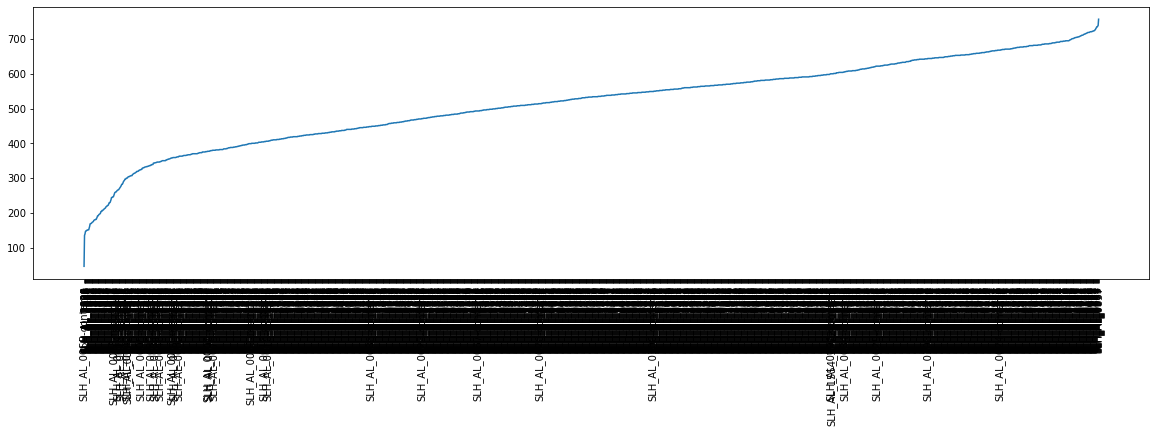

In [97]:
import matplotlib.pyplot as plt

few_clust = merged2.stats.consensus_total < 1000
keep = merged2.stats.consensus_total[few_clust].index.tolist()

plt.figure(figsize=(20,5))
#plt.bar(x=keep, height=merged2.stats.consensus_total[few_clust].sort_values())
plt.plot(merged2.stats.consensus_total[few_clust].sort_values())
plt.xticks(rotation = 90)
plt.show()

In [139]:
import toyplot 

few_clust_plot = merged2.stats.consensus_total < 200
keep_plot = merged2.stats.consensus_total[few_clust_plot].index.tolist()

canvas = toyplot.Canvas(width=2000, height=300)
toyplot.bars(merged2.stats.consensus_total[few_clust_plot].sort_values(), color="black");

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="2000.0px" height="300.0px" viewBox="0 0 2000.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t845d9e24d76442a28ba0b9281a22505f">

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="600px" height="600px" viewBox="0 0 600 600" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t69403d7a409a453c9280db11c7a7ae26"> 0 10 20 30 40 0 50 100 150 200

In [77]:
merged2.stats.consensus_total.sort_values()

SLH_AL_0055-contemp       46
SLH_AL_2825              135
SLH_AL_2920              139
SLH_AL_2896              146
SLH_AL_2906              148
                       ...  
palmeri                63509
hybridus               63695
hypochondriacus        66076
beet                   73391
tuberculatus           79368
Name: consensus_total, Length: 2188, dtype: object

In [138]:
merged2.stats.consensus_total.sort_values().head(50)

SLH_AL_0055-contemp     46
SLH_AL_2825            135
SLH_AL_2920            139
SLH_AL_2896            146
SLH_AL_2906            148
SLH_AL_2855            148
SLH_AL_2942            150
SLH_AL_2940            150
SLH_AL_2867            151
SLH_AL_1011            151
SLH_AL_2897            151
SLH_AL_2966            156
SLH_AL_2895            161
SLH_AL_2949            168
SLH_AL_2952            169
SLH_AL_2798            169
SLH_AL_2977            170
SLH_AL_2864            172
SLH_AL_2964            173
SLH_AL_2994            174
SLH_AL_1006            175
SLH_AL_2861            178
SLH_AL_2989            179
SLH_AL_2848            180
SLH_AL_2888            180
SLH_AL_2801            181
SLH_AL_2828            181
SLH_AL_2979            184
SLH_AL_2988            187
SLH_AL_2898            191
SLH_AL_2958            191
SLH_AL_2886            193
SLH_AL_2868            195
SLH_AL_3053            196
SLH_AL_2797            197
SLH_AL_2866            198
SLH_AL_2953            203
S

Remove samples with very small number of consensus clusters.

In [140]:
failed3 = merged2.stats.consensus_total < 152
omit3 = merged2.stats.consensus_total[failed3].index.tolist()
print(len(omit3))
omit3

11


['SLH_AL_0055-contemp',
 'SLH_AL_1011',
 'SLH_AL_2825',
 'SLH_AL_2855',
 'SLH_AL_2867',
 'SLH_AL_2896',
 'SLH_AL_2897',
 'SLH_AL_2906',
 'SLH_AL_2920',
 'SLH_AL_2940',
 'SLH_AL_2942']

In [141]:
mask2 = merged2.stats.consensus_total > 152
keep2 = merged2.stats.consensus_total[mask2].index.tolist()

In [143]:
merged3 = merged2.branch("More152clusters", subsample=keep2)

ValidationError: 1 validation error for SampleSchema
files -> clusters
  str type expected (type=type_error.str)

In [ ]:
merged3.run("67", force=True,  cores=75, quiet=False)

Step 3: Denovo clustering reads within samples
[####################] 100% 0:12:43 | merging overlapping paired reads
[####################] 100% 0:00:07 | joining non-overlapping pairs
[####################] 100% 0:00:27 | tagging reads for decloning    
[####################] 100% 0:07:48 | dereplicating       
[####################] 100% 0:00:09 | moving tags to header
[####################] 100% 3:17:13 | clustering          
[####################] 100% 0:00:00 | building clusters   
[####################] 100% 0:00:00 | chunking clusters   
[#                   ]   5% 4:35:51 | aligning clusters   

In [58]:
# find out which species are the samples that I omited due to low read number 
import pandas
species_tab = pandas.read_table("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/accession_species.txt", sep= '\t')

species_tab

,sample,Accession,Species
0,SLH_AL_0001-restricted,PI 654436,Amaranthus hybridus
1,SLH_AL_0002-restricted,Ames 30414,Amaranthus pumilus
2,SLH_AL_0003-restricted,PI 553080,Amaranthus pumilus
3,SLH_AL_0004-restricted,PI 553081,Amaranthus pumilus
4,SLH_AL_0005-restricted,PI 553082,Amaranthus pumilus
...,...,...,...
3072,SLH_AL_3064,PI 669845,Amaranthus viridis
3073,SLH_AL_3065,PI 633593,Amaranthus watsonii
3074,SLH_AL_3066,PI 632242,Amaranthus wrightii
3075,SLH_AL_3067,PI 632243,Amaranthus wrightii


In [129]:
# initialize a list
bad_species = []

# for each row in the species table
for index, row in species_tab.iterrows():
    
    # if the sample is in omit
    if row["sample"] in omit: 
        
        #add the species name to the list
        bad_species.append(row["Species"])
        
print(bad_species)

['Amaranthus blitoides', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranthus caudatus', 'Amaranth

In [181]:
import numpy as np

for i in np.unique(bad_species):
    print(i, " | ", round((bad_species.count(i)/species_tab.Species.value_counts()[i]*100), 1), "% of these sample failed")

Amaranthus blitoides  |  14.3 % of these sample failed
Amaranthus caudatus  |  8.6 % of these sample failed
Amaranthus cruentus  |  4.9 % of these sample failed
Amaranthus fimbriatus  |  50.0 % of these sample failed
Amaranthus graecizans aschersonianus  |  9.1 % of these sample failed
Amaranthus hybridus  |  2.4 % of these sample failed
Amaranthus hypochondriacus  |  2.7 % of these sample failed
Amaranthus quitensis  |  1.0 % of these sample failed
Amaranthus tricolor  |  2.2 % of these sample failed
Amaranthus tuberculatus  |  2.0 % of these sample failed
Amaranthus viridis  |  5.6 % of these sample failed


In [183]:
# which accession numbners failed and is there a pattern? 

# initialize a list
bad_accession = []

# for each row in the species table
for index, row in species_tab.iterrows():
    
    # if the sample is in omit
    if row["sample"] in omit: 
        
        #add the accession number to the list
        bad_accession.append(row["Accession"])
        
print(bad_accession)

['PI 553079 ', 'Ames 2212 ', 'Ames 13225 ', 'Ames 14976 ', 'Ames 15139 ', 'Ames 15140 ', 'Ames 15151 ', 'PI 480805 ', 'PI 480836 ', 'PI 481025 ', 'PI 481041 ', 'PI 481052 ', 'PI 481057 ', 'PI 481059 ', 'PI 481061 ', 'PI 481066 ', 'PI 481098 ', 'PI 481113 ', 'PI 481124 ', 'PI 481125 ', 'PI 481607 ', 'PI 481947 ', 'PI 481951 ', 'PI 481952 ', 'PI 481955 ', 'PI 481956 ', 'PI 481958 ', 'PI 481964 ', 'PI 481965 ', 'PI 481966 ', 'PI 481968 ', 'PI 490426 ', 'PI 490427 ', 'PI 490428 ', 'PI 490440 ', 'PI 490445 ', 'PI 490447 ', 'PI 490457 ', 'PI 490464 ', 'PI 490469 ', 'PI 490541 ', 'PI 490558 ', 'PI 490579 ', 'PI 490603 ', 'PI 490607 ', 'PI 568135 ', 'PI 649227 ', 'PI 669853 ', 'PI 677040 ', 'Ames 15184 ', 'Ames 18017 ', 'Ames 21662 ', 'PI 451710 ', 'PI 451711 ', 'PI 462371 ', 'PI 500287 ', 'PI 511716 ', 'PI 566897 ', 'PI 566898 ', 'PI 576450 ', 'PI 576460 ', 'PI 642735 ', 'PI 643047 ', 'PI 643051 ', 'PI 643054 ', 'PI 649507 ', 'Ames 32417 ', 'PI 605738 ', 'PI 288277 ', 'Ames 30695 ', 'PI 50027

In [189]:
failed_samp_dict = {"bad_species":bad_species, "bad_accessions":bad_accession}
df = pandas.DataFrame(failed_samp_dict)
df

,bad_species,bad_accessions
0,Amaranthus blitoides,PI 553079
1,Amaranthus caudatus,Ames 2212
2,Amaranthus caudatus,Ames 13225
3,Amaranthus caudatus,Ames 14976
4,Amaranthus caudatus,Ames 15139
...,...,...
114,Amaranthus tricolor,Ames 1998
115,Amaranthus tricolor,Ames 2100
116,Amaranthus tricolor,Ames 2102
117,Amaranthus tuberculatus,PI 603890


In [256]:
import glob

list_of_jsons = glob.glob("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_*.json")
list_of_jsons.sort()
print(list_of_jsons)

['/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate10.json', '/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate11.json', '/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate12.json', '/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate13.json', '/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate15.json', '/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate17.json', '/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate18.json', '/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate19.json', '/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate2.json', '/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate20.json', '/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate21.json', '/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate22.json', '/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate23.json', '/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate25

In [297]:
for (i,j) in [(i,j) for i in omit for j in list_of_jsons]:
    lib = ip.load_json(j)
    if i in lib.samples:
        print(j)

/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate5.json
/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate2.json
/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate22.json
/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate22.json
/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate3.json
/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate3.json
/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate17.json
/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate12.json
/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate4.json
/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate17.json
/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate10.json
/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate22.json
/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate19.json
/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/SLH_AL_RADcap_plate17.json
/pinky/sandra/RADcap/Run1_5apr2022/ipyr

In [304]:
# create your dictionary here.
counter = {}

# iterate over every number in the integer_list
for samples in bad_species:
    
    # if the number is not yet in the counter dict, add it as a key w/ value=1
    if samples not in counter:
        counter[samples] = 1
    
    # if the number is already in the counter dict then increment the value + 1 
    else:
        counter[samples] += 1

counter

{'Amaranthus blitoides': 1,
 'Amaranthus caudatus': 48,
 'Amaranthus cruentus': 17,
 'Amaranthus fimbriatus': 2,
 'Amaranthus graecizans aschersonianus': 1,
 'Amaranthus hybridus': 3,
 'Amaranthus hypochondriacus': 40,
 'Amaranthus quitensis': 1,
 'Amaranthus tricolor': 4,
 'Amaranthus tuberculatus': 1,
 'Amaranthus viridis': 1}

In [74]:
species_tab.sample

<bound method NDFrame.sample of                       sample   Accession                 Species
0     SLH_AL_0001-restricted   PI 654436     Amaranthus hybridus
1     SLH_AL_0002-restricted  Ames 30414      Amaranthus pumilus
2     SLH_AL_0003-restricted   PI 553080      Amaranthus pumilus
3     SLH_AL_0004-restricted   PI 553081      Amaranthus pumilus
4     SLH_AL_0005-restricted   PI 553082      Amaranthus pumilus
...                      ...         ...                     ...
3072             SLH_AL_3064  PI 669845       Amaranthus viridis
3073             SLH_AL_3065  PI 633593      Amaranthus watsonii
3074             SLH_AL_3066  PI 632242      Amaranthus wrightii
3075             SLH_AL_3067  PI 632243      Amaranthus wrightii
3076             SLH_AL_3068  PI 664490   Amaranthus tucsonensis

[3077 rows x 3 columns]>

In [56]:
omit

['SLH_AL_0009-contemp',
 'SLH_AL_0023',
 'SLH_AL_0052',
 'SLH_AL_0082',
 'SLH_AL_0086-contemp',
 'SLH_AL_0092',
 'SLH_AL_0104',
 'SLH_AL_0105',
 'SLH_AL_0116',
 'SLH_AL_0189_0214_contam',
 'SLH_AL_0190',
 'SLH_AL_0195',
 'SLH_AL_0208',
 'SLH_AL_0214',
 'SLH_AL_0222',
 'SLH_AL_0225',
 'SLH_AL_0227',
 'SLH_AL_0228',
 'SLH_AL_0230',
 'SLH_AL_0234',
 'SLH_AL_0236',
 'SLH_AL_0239',
 'SLH_AL_0240',
 'SLH_AL_0245',
 'SLH_AL_0246',
 'SLH_AL_0249',
 'SLH_AL_0250',
 'SLH_AL_0253',
 'SLH_AL_0254',
 'SLH_AL_0256',
 'SLH_AL_0262',
 'SLH_AL_0263',
 'SLH_AL_0264',
 'SLH_AL_0266',
 'SLH_AL_0274',
 'SLH_AL_0275',
 'SLH_AL_0276',
 'SLH_AL_0282',
 'SLH_AL_0285',
 'SLH_AL_0287',
 'SLH_AL_0292',
 'SLH_AL_0299',
 'SLH_AL_0303',
 'SLH_AL_0372',
 'SLH_AL_0389',
 'SLH_AL_0410',
 'SLH_AL_0416',
 'SLH_AL_0420',
 'SLH_AL_0510',
 'SLH_AL_0552',
 'SLH_AL_0579',
 'SLH_AL_0592',
 'SLH_AL_0700',
 'SLH_AL_0714',
 'SLH_AL_0717',
 'SLH_AL_0725',
 'SLH_AL_0726',
 'SLH_AL_0729',
 'SLH_AL_0760',
 'SLH_AL_0767',
 'SLH_AL_078

In [ ]:
counter = {}
for i in species:
    
    # if the number is not yet in the counter dict, add it as a key w/ value=1
    if i not in counter:
        counter[i] = 1
    
    # if the number is already in the counter dict then increment the value + 1 
    else:
        counter[i] += 1

#list(species_tab.Species).count("Amaranthus hybridus")
i

In [10]:
beet = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/beet/beet.json")
hypo = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/hypochondriacus/hypochondriacus.json")
tuberculatus = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/tuberculatus/tuberculatus_genome.json")
palmeri = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/palmeri/palmeri.json")
cruentus = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/cruentus/cruentus.json")
hybridus = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/hybridus/hybridus.json")
deer = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/deeringia/deeringia.json")
herm = ip.load_json("/pinky/sandra/RADcap/Run1_5apr2022/ipyrad/hermbstaedtia/hermbstaedtia.json")

RAW_DATA_UGA =    "/moto/eaton/projects/RAW_DATA/Amaranthus/Amaranthus_UGA_3RAD_*.gz"
RAW_DATA_plate1 = "/moto/eaton/users/slh2181/phylogeny_ipyrad1/ipyrad/demux_i7s_fastqs/plate1_*.gz"
RAW_DATA_plate2 = "/moto/eaton/users/slh2181/phylogeny_ipyrad1/ipyrad/demux_i7s_fastqs/plate2_*.gz"
RAW_DATA_plate3 = "/moto/eaton/users/slh2181/phylogeny_ipyrad1/ipyrad/demux_tub_fastqs/Amaranthus_*.gz"

In [ ]:
# load accession:species dataframe
spnames = pd.read_csv("/moto/eaton/users/slh2181/phylogeny_ipyrad1/ipyrad/Amaranth_sample_names_tub.csv")

# subset only rows with species names not empty
spnames = spnames[spnames.Species.notna()]

# convert dataframe to a dictionary 
ndict = {spnames.Sample[i]: spnames.Species[i] for i in spnames.index}

# combine id and spp name into one long name
for key, value in ndict.items():
    ndict[key] = value + "_" + key

In [ ]:
import matplotlib.pyplot as plt
plt.plot(merged.stats.nloci.sort_values());

In [ ]:
pd.options.display.max_rows = 500
merged.stats.nloci < 5000

In [ ]:
mask = merged.stats.nloci < 1000
lose = merged.stats.nloci[mask].index.tolist()
lose

In [ ]:
maxSNP = merged.branch("229_samp_20aug21_lowdepth_maxSNP")
maxSNP.params.max_snps_locus = 0.4
maxSNP.params

In [ ]:
maxSNP.run("7", force=True, ipyclient='ipyrad')

In [ ]:
plt.scatter(maxSNP.stats.nloci,maxSNP.stats.mean_depth_total);
plt.xlim([0, 32000])
plt.show()

In [ ]:
plt.scatter(maxSNP.stats.nloci,maxSNP.stats.consensus_total);
plt.xlim([0, 32000])
plt.show()

In [ ]:
plt.scatter(maxSNP.stats.nloci,maxSNP.stats.reads_mapped_to_ref_prop);
plt.xlim([0, 32000])
plt.show()

In [ ]:
plt.scatter(maxSNP.stats.nloci,maxSNP.stats.reads_raw);
plt.xlim([0, 32000])
plt.show()